In [1]:
import f3dasm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

2022-10-03 16:28:12.777976: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [2]:
plt.style.use('science')

In [4]:
dim = 3
bounds = np.tile([-1.0,1.0], (dim, 1))
design = f3dasm.make_nd_continuous_design(bounds=bounds, dimensionality=dim)
data = f3dasm.Data(design=design)

In [5]:
args = {
'realizations': 3,
'iterations': 100,
'function': f3dasm.functions.Levy(dimensionality=dim, noise=None, scale_bounds=bounds),
'sampler': f3dasm.sampling.LatinHypercubeSampling(design=design),
'verbal': True
}



In [6]:
args['function'].offset

array([[-0.95340308, -0.16288703,  0.00349606]])

(<Figure size 504x504 with 1 Axes>,
 <Axes3DSubplot:xlabel='$X_{0}$', ylabel='$X_{1}$'>)

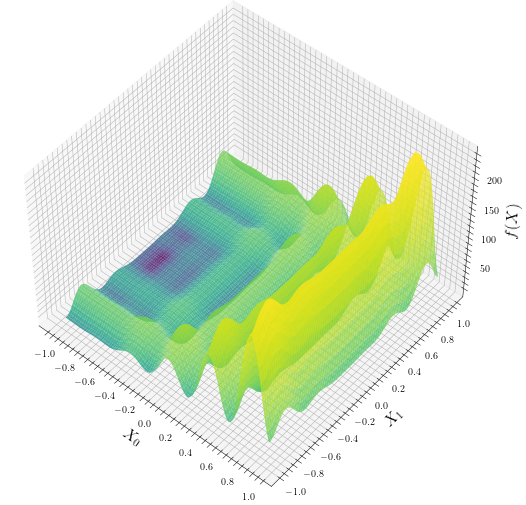

In [7]:
args['function'].plot(domain=bounds,px=100)

In [8]:
# hyperparameters=[{'learning_rate': x} for x in np.logspace(-8,2,11)]
# hyperparameters


In [9]:
# results = []

# for h in hyperparameters:
#     args_temp = args.copy()
#     args_temp['optimizer'] = f3dasm.optimization.Adamax(data=data, hyperparameters=h)
#     results.append(f3dasm.run_multiple_realizations(**args_temp))

In [10]:
results = []

for opt in [f3dasm.optimization.Adam, f3dasm.optimization.Adam2]:
    args_temp = args.copy()
    args_temp['optimizer'] = opt(data=data)
    results.append(f3dasm.run_multiple_realizations(**args_temp))

Optimization took 1.63s total


2022-10-03 16:28:19.394358: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-03 16:28:19.396551: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-03 16:28:19.399016: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations: 

Optimization took 1.72s total


In [11]:
def calc_mean_std(results):
    mean_y = pd.concat([d.get_output_data().cummin() for d in results], axis=1).mean(axis=1)
    std_y = pd.concat([d.get_output_data().cummin() for d in results], axis=1).std(axis=1)
    return mean_y, std_y

In [12]:
def plot_results(results, ax):
    mean_y, std_y = calc_mean_std(results.data)

    ax.plot(mean_y, label=f"optimizer={results.optimizer}")

    ax.fill_between(np.arange(len(mean_y)), mean_y-1.96*std_y, mean_y+1.96*std_y, alpha=.1)

    return ax

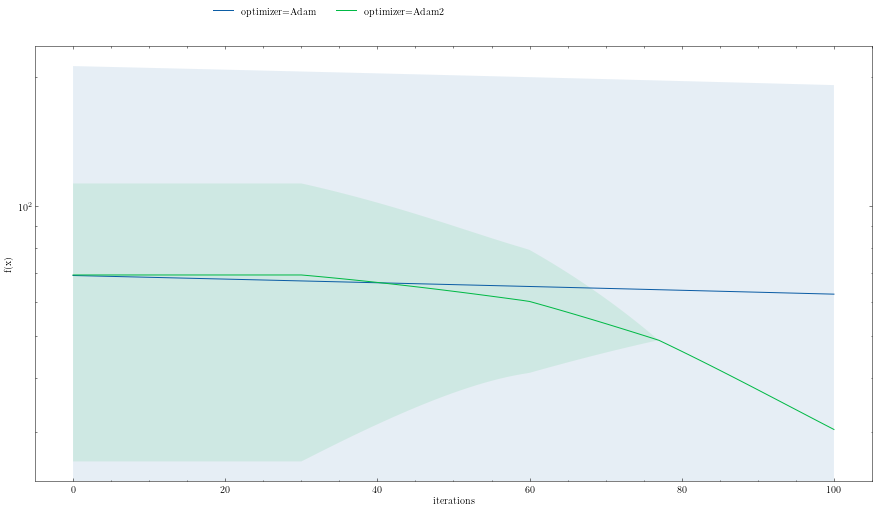

In [17]:
fig, ax = plt.figure(figsize=(15,8)), plt.axes()

ax.set_xlabel('iterations')
ax.set_ylabel('f(x)')
ax.set_yscale('log')

opt_names = ['Adam','Adam2']

for index, res in enumerate(results):
    ax = plot_results(res, ax, f"optimizer={opt_names[index]}")

ax.legend(loc='lower right', bbox_to_anchor=(0.5, 1.05),
          ncol=3, fancybox=True, shadow=True)